# Predefined colors in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
%matplotlib notebook

### What methods/attributes can be used?

In [2]:
dir(mpl_colors)

['BASE_COLORS',
 'BoundaryNorm',
 'CSS4_COLORS',
 'ColorConverter',
 'Colormap',
 'LightSource',
 'LinearSegmentedColormap',
 'ListedColormap',
 'LogNorm',
 'NoNorm',
 'Normalize',
 'PowerNorm',
 'Sized',
 'SymLogNorm',
 'TABLEAU_COLORS',
 'XKCD_COLORS',
 '_ColorMapping',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_colors_full_map',
 '_is_nth_color',
 '_sanitize_extrema',
 '_to_rgba_no_colorcycle',
 '_vector_magnitude',
 'cbook',
 'cnames',
 'colorConverter',
 'from_levels_and_colors',
 'get_named_colors_mapping',
 'hex2color',
 'hexColorPattern',
 'hsv_to_rgb',
 'is_color_like',
 'itertools',
 'makeMappingArray',
 'np',
 're',
 'rgb2hex',
 'rgb_to_hsv',
 'same_color',
 'to_hex',
 'to_rgb',
 'to_rgba',
 'to_rgba_array']

## Plotting the available base colors

In [3]:
bcolors = mpl_colors.BASE_COLORS

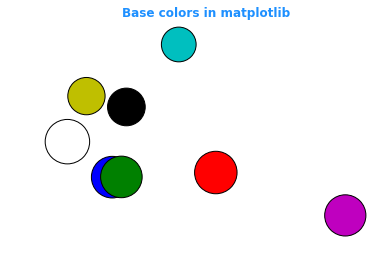

In [4]:
fig, ax = plt.subplots()
# x, y = np.random.rand(len(bcolors)), np.random.rand(len(bcolors))

mu, sigma = 0, 0.5 # mean and standard deviation
x = np.random.normal(mu, sigma, len(bcolors))
y = np.random.normal(mu, sigma, len(bcolors))

s = np.random.randint(1000, high=2000, size=len(bcolors))
ax.scatter(x, y, s=s, c=list(bcolors.keys()), edgecolors='k')
ax.set_title('Base colors in matplotlib', fontsize=12, color='dodgerblue', fontweight='bold')
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
ax.axis('off')

if False:
    plt.savefig('base_colors.png', dpi=300)

### Create a dictionary to harbor all the available colors, bothe the base colors and the larger list of named colors

In [5]:
ncolors = mpl_colors.CSS4_COLORS
bn_colors = dict(**bcolors, **ncolors)

### Sort colors using: hue, saturation, value, name

In [6]:
func = lambda c: mpl_colors.rgb_to_hsv(mpl_colors.to_rgba(c)[:3])
aux_hsv = [[list(func(color_x)), name_x] for name_x, color_x in bn_colors.items()]
aux_hsv = sorted(aux_hsv)
cnames_sorted = [name for hsv, name in aux_hsv]

### Let's do a quick inpection

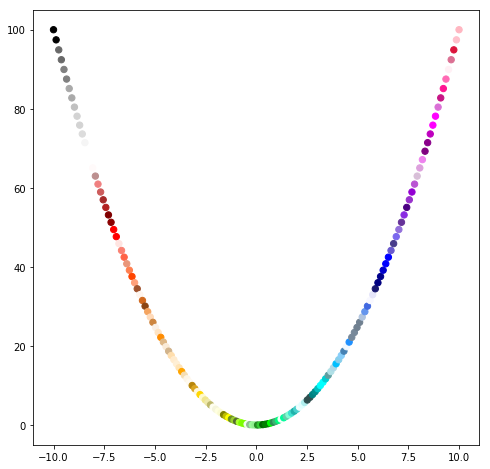

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(-10, 10, len(cnames_sorted))
y = np.power(x, 2)
ax.scatter(x, y, c=cnames_sorted, s=40)

### Now, plot of the available color, getting some ideas from the matplotlib example

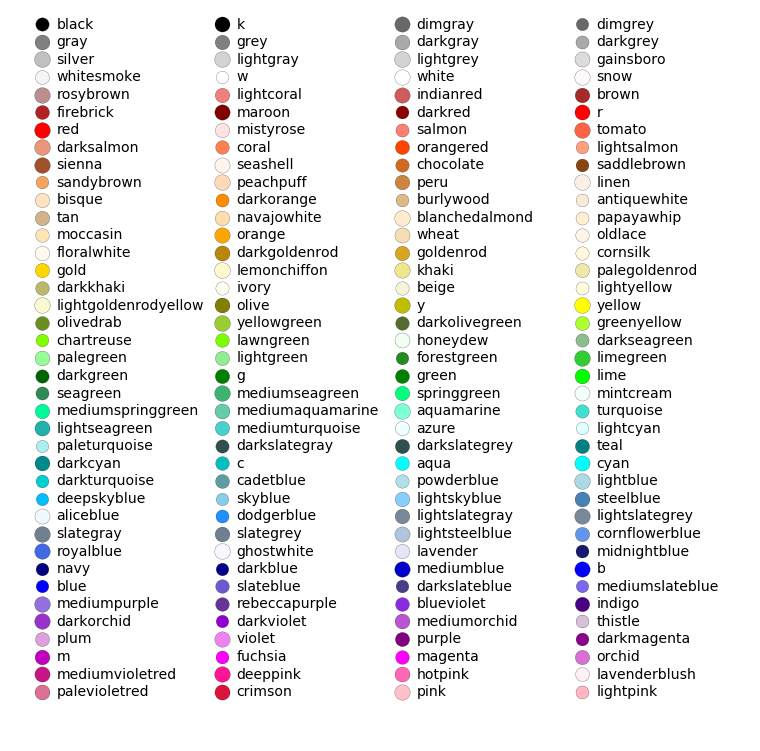

In [8]:
n = len(cnames_sorted)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(10, 10))

X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(cnames_sorted):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi = w * (col + 0.05)
    # xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.13)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')
    ax.scatter(xi, y, c=name, s=np.random.randint(150, high=250),
              edgecolor='k', lw=0.2)
    
ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0.2, wspace=0.2)
if False:
    fig.savefig('named_colors.png', dpi=300)